# Yelp Images Feature Extraction


## 1. Setup

In [ ]:
# Package Loading and Environment Setup #############################################################################

import numpy as np
import matplotlib.pyplot as plt

# display plots in this notebook
%matplotlib inline

# set display defaults
plt.rcParams['figure.figsize'] = (10, 10)        # large images
plt.rcParams['image.interpolation'] = 'nearest'  # don't interpolate: show square pixels
plt.rcParams['image.cmap'] = 'gray'              # use grayscale output rather than a color heatmap


In [7]:
import sys
caffe_root = '/Users/yanjin1993/caffe/' 
sys.path.insert(0, caffe_root + 'python')        
import caffe                                     # if you get "No module named _caffe", either you have not 
                                                 # built pycaffe or you have the wrong path.

In [ ]:
# import os
if os.path.isfile(caffe_root + 'models/bvlc_reference_caffenet/bvlc_reference_caffenet.caffemodel'):
    print 'CaffeNet found.'                      # if needed, download the reference model ("CaffeNet")
else:
    print 'Downloading pre-trained CaffeNet model...'
    !../scripts/download_model_binary.py ../models/bvlc_reference_caffenet

#####################################################################################################################

## 2.  Load net and set up input preprocessing

   Set Caffe to CPU mode and load the net from disk.

In [9]:
# Load Net and Set Up Input Processing ##############################################################################
caffe.set_mode_cpu()

model_def = caffe_root + 'models/bvlc_reference_caffenet/deploy.prototxt'
model_weights = caffe_root + 'models/bvlc_reference_caffenet/bvlc_reference_caffenet.caffemodel'

net = caffe.Net(model_def,                      # defines the structure of the model
                model_weights,                  # contains the trained weights
                caffe.TEST)                     # use test mode (e.g., don't perform dropout)


Set up input preprocessing. (We'll use Caffe's caffe.io.Transformer to do this, but this step is independent of other parts of Caffe, so any custom preprocessing code may be used).

In [10]:
# load the mean ImageNet image (as distributed with Caffe) for subtraction
mu = np.load(caffe_root + 'python/caffe/imagenet/ilsvrc_2012_mean.npy')
mu = mu.mean(1).mean(1)  # average over pixels to obtain the mean (BGR) pixel values
print 'mean-subtracted values:', zip('BGR', mu)

mean-subtracted values: [('B', 104.0069879317889), ('G', 116.66876761696767), ('R', 122.6789143406786)]


In [15]:
# create transformer for the input called 'data'
transformer = caffe.io.Transformer({'data': net.blobs['data'].data.shape})

transformer.set_transpose('data', (2,0,1))      # move image channels to outermost dimension
transformer.set_mean('data', mu)                # subtract the dataset-mean value in each channel
transformer.set_raw_scale('data', 255)          # rescale from [0, 1] to [0, 255]
transformer.set_channel_swap('data', (2,1,0))   # swap channels from RGB to BGR

net.blobs['data'].reshape(1,        # batch size
                          3,         # 3-channel (BGR) images
                          227, 227)  # image size is 227x227
#####################################################################################################################

## 3. Get Image Directories 
Here, we need to get images' directories for 98476 images. 

In [3]:
import pandas as pd    # Make a dataframe conatining all images' directories 
import glob, os
os.chdir("/Users/yanjin1993/Google Drive/Columbia University /2016 Fall /Big Data Analytics/final_project/data/pictures")
#for file in glob.glob("*.jpg"):
#    print(os.path.join("/Users/yanjin1993/Google Drive/Columbia University /2016 Fall /Big Data Analytics/final_project/data/pictures/", file))

## 4. Feature Extractions Using CNN

## 5. CPU Image Visualization

Test on some of the images from Yelp data

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


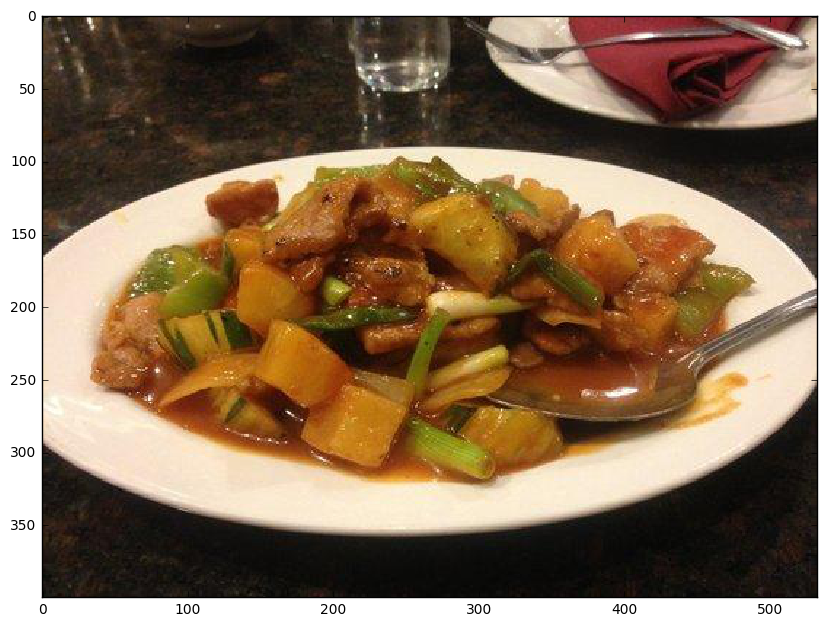

In [13]:
# CPU Image Processing ##############################################################################################
image = caffe.io.load_image('/Users/yanjin1993/Google Drive/Columbia University /2016 Fall /Big Data Analytics/final_project/data/pictures/__7Mo5lLIHs5aKAh1uVOVA.jpg')
transformed_image = transformer.preprocess('data', image)
plt.imshow(image)

In [14]:
# copy the image data into the memory allocated for the net
net.blobs['data'].data[...] = transformed_image

output = net.forward()

output_prob = output['prob'][0]  # the output probability vector for the first image in the batch

print 'predicted class is:', output_prob.argmax()

predicted class is: 923
